In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
# Load the commodity price data
commodity_data = pd.read_csv('Sugar11Futures_SB_NYB.csv')
commodity_data = commodity_data.rename(columns={'Date': 'DATE'})
commodity_data = commodity_data.set_index('DATE')

# Load the weather data for different locations
weather_data_arg = pd.read_csv('Argentina_Weather.csv', index_col='DATE')
weather_data_bra = pd.read_csv('Brazil_Weather.csv', index_col='DATE')
weather_data_cal = pd.read_csv('California_Weather.csv', index_col='DATE')
weather_data_ill = pd.read_csv('Illinois_Weather.csv', index_col='DATE')
weather_data_iow = pd.read_csv('Iowa_Weather.csv', index_col='DATE')
weather_data_min = pd.read_csv('Minnesota_Weather.csv', index_col='DATE')
weather_data_neb = pd.read_csv('Nebraska_Weather.csv', index_col='DATE')

In [3]:
commodity_data

,Open,High,Low,Close,Adj Close,Volume
DATE,,,,,,
2018-01-02,15.080000,15.340000,15.040000,15.330000,15.330000,52804
2018-01-03,15.350000,15.370000,15.180000,15.310000,15.310000,59103
2018-01-04,15.270000,15.340000,14.850000,15.250000,15.250000,67438
2018-01-05,15.180000,15.240000,14.980000,15.080000,15.080000,45961
2018-01-08,14.990000,15.050000,14.540000,14.780000,14.780000,90152
...,...,...,...,...,...,...
2022-12-23,20.950001,21.180000,20.809999,20.980000,20.980000,33246
2022-12-27,20.980000,20.990000,20.230000,20.320000,20.320000,44670
2022-12-28,20.270000,20.490000,20.100000,20.160000,20.160000,49490


In [4]:
# Merge the commodity data and weather data into a single DataFrame
data_arg = pd.merge(commodity_data, weather_data_arg, on='DATE')
data_bra = pd.merge(commodity_data, weather_data_bra, on='DATE')
data_cal = pd.merge(commodity_data, weather_data_cal, on='DATE')
data_ill = pd.merge(commodity_data, weather_data_ill, on='DATE')
data_iow = pd.merge(commodity_data, weather_data_iow, on='DATE')
data_min = pd.merge(commodity_data, weather_data_min, on='DATE')
data_neb = pd.merge(commodity_data, weather_data_neb, on='DATE')

In [5]:
data_arg

,Open,High,Low,Close,Adj Close,Volume,Mean_Temp,Max_Temp,Min_Temp,Mean_Precip,Mean_WindSpeed
DATE,,,,,,,,,,,
2018-01-02,15.080000,15.340000,15.040000,15.330000,15.330000,52804,22.109231,34.2,4.8,0.108906,7.169231
2018-01-03,15.350000,15.370000,15.180000,15.310000,15.310000,59103,23.378462,38.7,4.0,0.030156,7.518462
2018-01-04,15.270000,15.340000,14.850000,15.250000,15.250000,67438,25.525000,41.1,3.5,0.028889,9.192187
2018-01-05,15.180000,15.240000,14.980000,15.080000,15.080000,45961,23.567692,42.0,5.8,0.126230,9.741538
2018-01-08,14.990000,15.050000,14.540000,14.780000,14.780000,90152,25.449231,41.5,4.1,0.006885,7.047692
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,20.950001,21.180000,20.809999,20.980000,20.980000,33246,22.800000,43.5,1.0,0.137912,9.341758
2022-12-27,20.980000,20.990000,20.230000,20.320000,20.320000,44670,22.661798,36.7,2.7,0.023708,7.328090
2022-12-28,20.270000,20.490000,20.100000,20.160000,20.160000,49490,22.579070,37.6,0.7,0.067294,7.233721


In [6]:
train_data_arg = data_arg[:'2022-12']
test_data_arg = data_arg['2022-12':]

train_data_bra = data_bra[:'2022-12']
test_data_bra = data_bra['2022-12':]

train_data_cal = data_cal[:'2022-12']
test_data_cal = data_cal['2022-12':]

train_data_ill = data_ill[:'2022-12']
test_data_ill = data_ill['2022-12':]

train_data_iow = data_iow[:'2022-12']
test_data_iow = data_iow['2022-12':]

train_data_min = data_min[:'2022-12']
test_data_min = data_min['2022-12':]

train_data_neb = data_neb[:'2022-12']
test_data_neb = data_neb['2022-12':]


In [7]:
test_data_arg.shape

(21, 11)

In [8]:
# For ARG
exog_train_arg = train_data_arg[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_arg = test_data_arg[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]

# For BRA
exog_train_bra = train_data_bra[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_bra = test_data_bra[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]

# For CAL
exog_train_cal = train_data_cal[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_cal = test_data_cal[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]

# For ILL
exog_train_ill = train_data_ill[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_ill = test_data_ill[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]

# For IOW
exog_train_iow = train_data_iow[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_iow = test_data_iow[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]

# For MIN
exog_train_min = train_data_min[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_min = test_data_min[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]

# For NEB
exog_train_neb = train_data_neb[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_neb = test_data_neb[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]


In [9]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [ ]:
order = (0,1,0)
# For ARG
model_arg = sm.tsa.ARIMA(train_data_arg['Close'], order=order, exog=exog_train_arg)
result_arg = model_arg.fit()

# For BRA
model_bra = sm.tsa.ARIMA(train_data_bra['Close'], order=order, exog=exog_train_bra)
result_bra = model_bra.fit()

# For CAL
model_cal = sm.tsa.ARIMA(train_data_cal['Close'], order=order, exog=exog_train_cal)
result_cal = model_cal.fit()

# For ILL
model_ill = sm.tsa.ARIMA(train_data_ill['Close'], order=order, exog=exog_train_ill)
result_ill = model_ill.fit()

# For IOW
model_iow = sm.tsa.ARIMA(train_data_iow['Close'], order=order, exog=exog_train_iow)
result_iow = model_iow.fit()

# For MIN
model_min = sm.tsa.ARIMA(train_data_min['Close'], order=order, exog=exog_train_min)
result_min = model_min.fit()

# For NEB
model_neb = sm.tsa.ARIMA(train_data_neb['Close'], order=order, exog=exog_train_neb)
result_neb = model_neb.fit()


In [35]:
import matplotlib.pyplot as plt
# For ARG
pred_arg = result_arg.forecast(steps=21, exog=exog_test_arg)
pred_arg = pd.DataFrame(pred_arg[0], index=test_data_arg.index, columns=['Predictions_ARG'])

# For BRA
pred_bra = result_bra.forecast(steps=21, exog=exog_test_bra)
pred_bra = pd.DataFrame(pred_bra[0], index=test_data_bra.index, columns=['Predictions_BRA'])

# For CAL
pred_cal = result_cal.forecast(steps=21, exog=exog_test_cal)
pred_cal = pd.DataFrame(pred_cal[0], index=test_data_cal.index, columns=['Predictions_CAL'])

# For ILL
pred_ill = result_ill.forecast(steps=21, exog=exog_test_ill)
pred_ill = pd.DataFrame(pred_ill[0], index=test_data_ill.index, columns=['Predictions_ILL'])

# For IOW
pred_iow = result_iow.forecast(steps=21, exog=exog_test_iow)
pred_iow = pd.DataFrame(pred_iow[0], index=test_data_iow.index, columns=['Predictions_IOW'])

# For MIN
pred_min = result_min.forecast(steps=21, exog=exog_test_min)
pred_min = pd.DataFrame(pred_min[0], index=test_data_min.index, columns=['Predictions_MIN'])

# For NEB
pred_neb = result_neb.forecast(steps=21, exog=exog_test_neb)
pred_neb = pd.DataFrame(pred_neb[0], index=test_data_neb.index, columns=['Predictions_NEB'])




                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1236
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -40.467
Method:                           css   S.D. of innovations              0.250
Date:                Sat, 08 Apr 2023   AIC                             90.933
Time:                        00:19:47   BIC                            116.532
Sample:                             1   HQIC                           100.562
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0470      0.037     -1.258      0.209      -0.120       0.026
Mean_Temp         -0.0027      0.001     -1.959      0.050      -0.005    7.16e-07
Mean_Precip       -0.0109      0.067

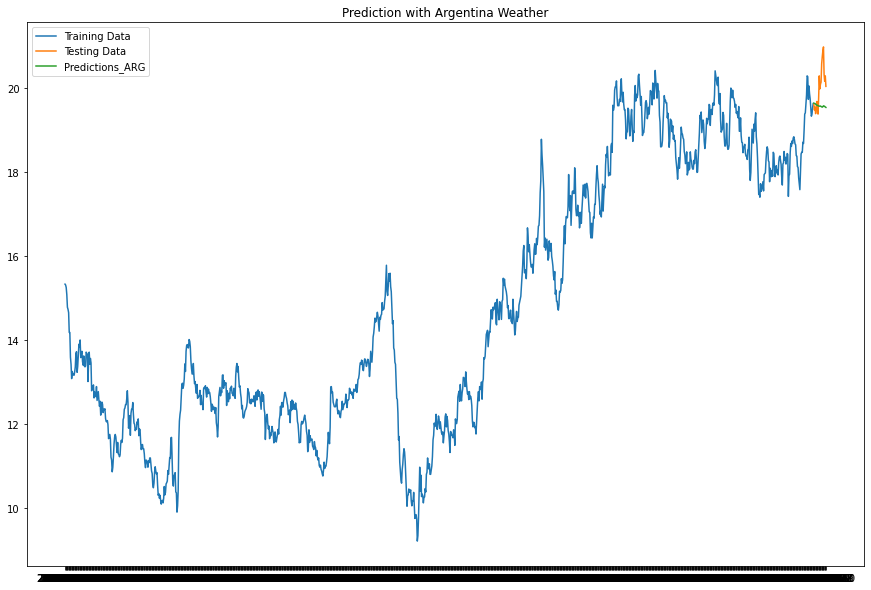

In [36]:
print(result_arg.summary())

# Plot the predicted values
plt.figure(figsize=(15, 10))

plt.plot(train_data_arg.index, train_data_arg['Close'], label='Training Data')
plt.plot(test_data_arg.index, test_data_arg['Close'], label='Testing Data')
plt.plot(pred_arg.index, pred_arg['Predictions_ARG'], label='Predictions_ARG')

plt.title('Prediction with Argentina Weather')
plt.legend(loc='best')
plt.show()

In [37]:
from sklearn.metrics import r2_score
r2_score(test_data_arg['Close'], pred_arg['Predictions_ARG'])

-0.9144431953610797

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1236
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -42.344
Method:                           css   S.D. of innovations              0.250
Date:                Sat, 08 Apr 2023   AIC                             94.688
Time:                        00:19:55   BIC                            120.286
Sample:                             1   HQIC                           104.317
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0514      0.100     -0.515      0.607      -0.247       0.144
Mean_Temp          0.0010      0.004      0.252      0.801      -0.007       0.009
Mean_Precip       -0.9555      0.540

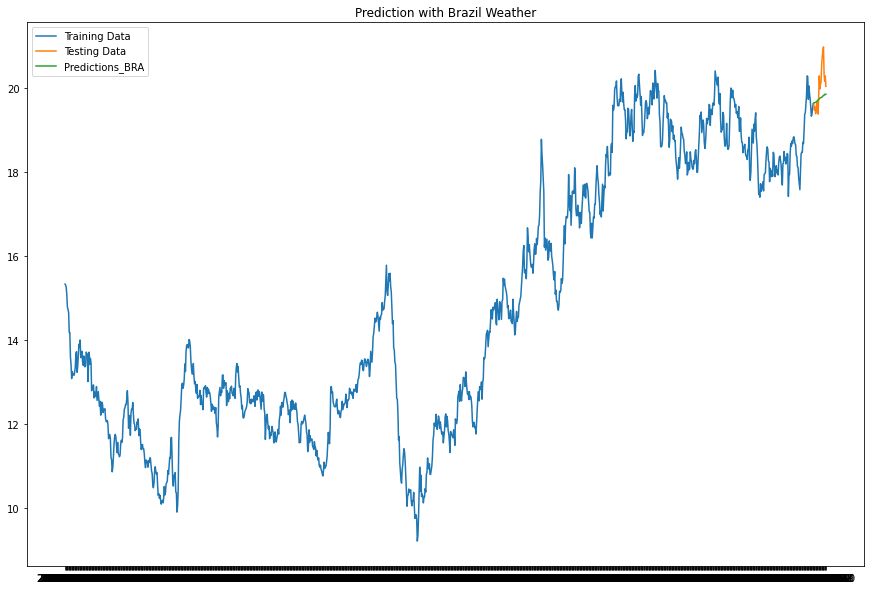

In [38]:
# Summary and plot for Brazil location
print(result_bra.summary())

plt.figure(figsize=(15, 10))

plt.plot(train_data_bra.index, train_data_bra['Close'], label='Training Data')
plt.plot(test_data_bra.index, test_data_bra['Close'], label='Testing Data')
plt.plot(pred_bra.index, pred_bra['Predictions_BRA'], label='Predictions_BRA')

plt.title('Prediction with Brazil Weather')
plt.legend(loc='best')
plt.show()

In [39]:
from sklearn.metrics import r2_score
r2_score(test_data_bra['Close'], pred_bra['Predictions_BRA'])

-0.1121148112312853

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1238
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -44.348
Method:                           css   S.D. of innovations              0.251
Date:                Sat, 08 Apr 2023   AIC                             98.695
Time:                        00:20:03   BIC                            124.301
Sample:                             1   HQIC                           108.326
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0118      0.032     -0.366      0.714      -0.075       0.051
Mean_Temp          0.0016      0.001      1.121      0.262      -0.001       0.004
Mean_Precip        0.0890      0.096

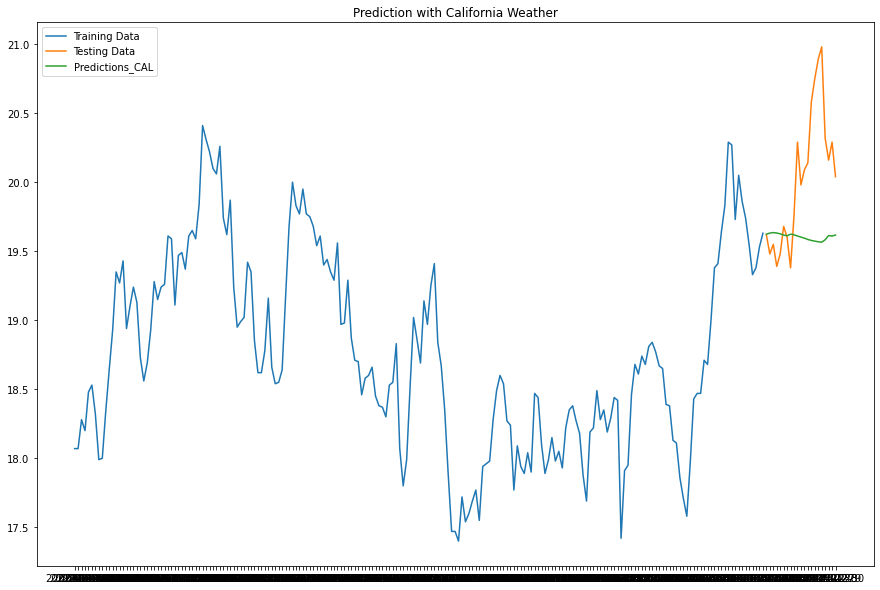

In [40]:
# Summary and plot for California location
print(result_cal.summary())

plt.figure(figsize=(15, 10))

plt.plot(train_data_cal.index[-200:], train_data_cal['Close'][-200:], label='Training Data')
plt.plot(test_data_cal.index, test_data_cal['Close'], label='Testing Data')
plt.plot(pred_cal.index, pred_cal['Predictions_CAL'], label='Predictions_CAL')

plt.title('Prediction with California Weather')
plt.legend(loc='best')
plt.show()

In [41]:
from sklearn.metrics import r2_score
r2_score(test_data_cal['Close'], pred_cal['Predictions_CAL'])

-0.81944622727588

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1238
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -42.112
Method:                           css   S.D. of innovations              0.250
Date:                Sat, 08 Apr 2023   AIC                             94.224
Time:                        00:20:04   BIC                            119.830
Sample:                             1   HQIC                           103.854
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0106      0.023      0.471      0.638      -0.034       0.055
Mean_Temp          0.0002      0.001      0.245      0.806      -0.001       0.002
Mean_Precip        0.1068      0.049

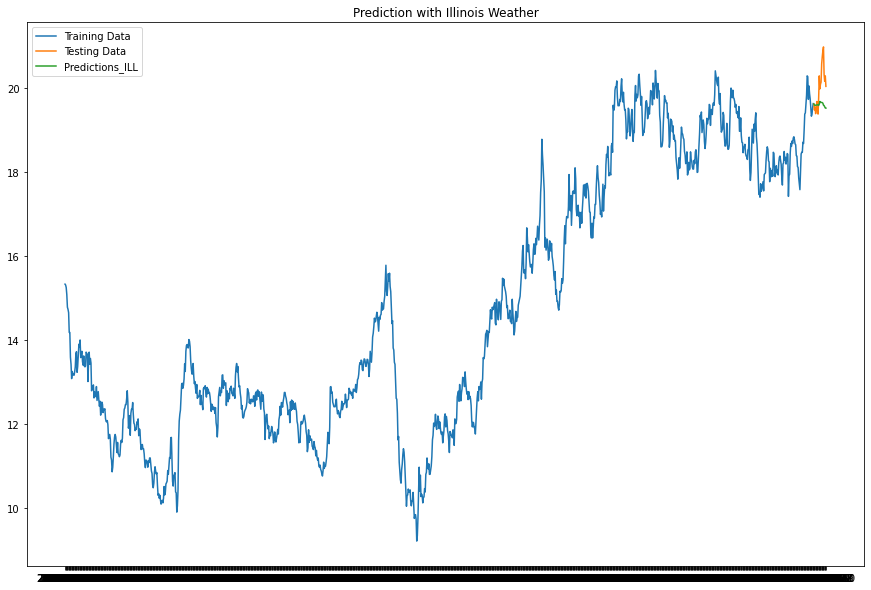

In [42]:
# Summary and plot for Illinois location
print(result_ill.summary())

plt.figure(figsize=(15, 10))

plt.plot(train_data_ill.index, train_data_ill['Close'], label='Training Data')
plt.plot(test_data_ill.index, test_data_ill['Close'], label='Testing Data')
plt.plot(pred_ill.index, pred_ill['Predictions_ILL'], label='Predictions_ILL')

plt.title('Prediction with Illinois Weather')
plt.legend(loc='best')
plt.show()

In [43]:
from sklearn.metrics import r2_score
r2_score(test_data_ill['Close'], pred_ill['Predictions_ILL'])

-0.7092543624657552

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1238
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -43.504
Method:                           css   S.D. of innovations              0.251
Date:                Sat, 08 Apr 2023   AIC                             97.007
Time:                        00:20:12   BIC                            122.613
Sample:                             1   HQIC                           106.638
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0101      0.022     -0.462      0.644      -0.053       0.033
Mean_Temp          0.0004      0.001      0.638      0.524      -0.001       0.002
Mean_Precip        0.0857      0.059

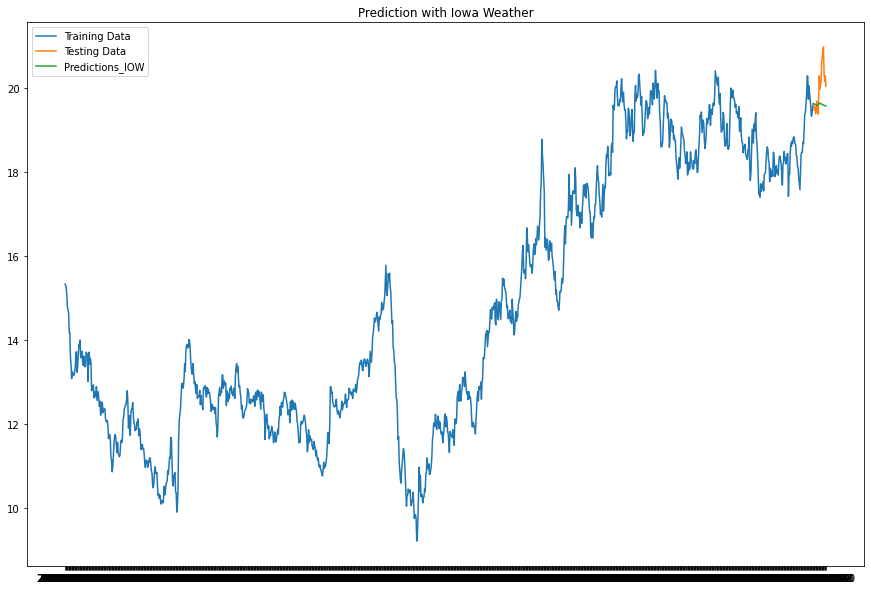

In [44]:
# Summary and plot for Iowa location
print(result_iow.summary())

plt.figure(figsize=(15, 10))

plt.plot(train_data_iow.index, train_data_iow['Close'], label='Training Data')
plt.plot(test_data_iow.index, test_data_iow['Close'], label='Testing Data')
plt.plot(pred_iow.index, pred_iow['Predictions_IOW'], label='Predictions_IOW')

plt.title('Prediction with Iowa Weather')
plt.legend(loc='best')
plt.show()

In [45]:
from sklearn.metrics import r2_score
r2_score(test_data_iow['Close'], pred_iow['Predictions_IOW'])

-0.7394893122287216

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1238
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -44.191
Method:                           css   S.D. of innovations              0.251
Date:                Sat, 08 Apr 2023   AIC                             98.381
Time:                        00:20:20   BIC                            123.987
Sample:                             1   HQIC                           108.012
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0034      0.020     -0.173      0.862      -0.042       0.036
Mean_Temp          0.0004      0.001      0.619      0.536      -0.001       0.002
Mean_Precip        0.0737      0.073

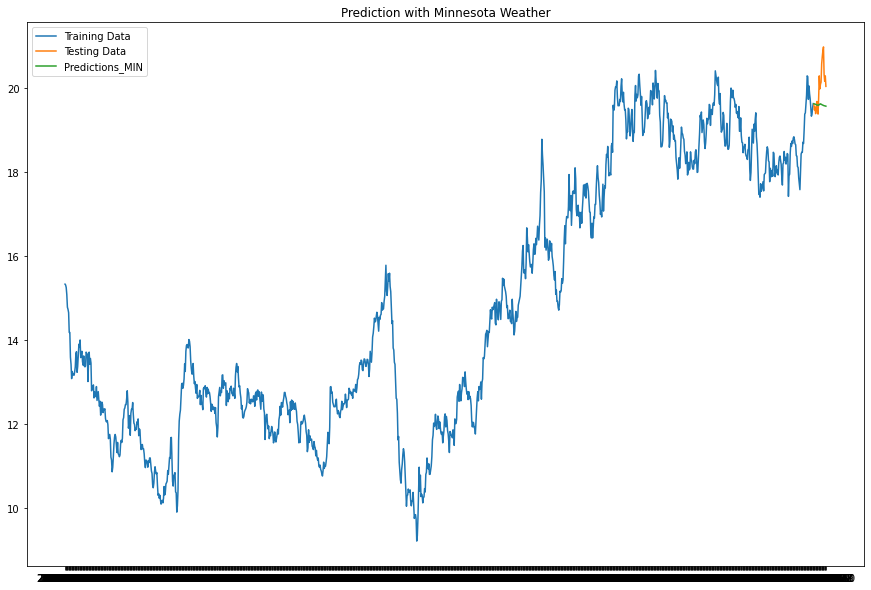

In [46]:
# Summary and plot for Minnesota location
print(result_min.summary())

plt.figure(figsize=(15, 10))

plt.plot(train_data_min.index, train_data_min['Close'], label='Training Data')
plt.plot(test_data_min.index, test_data_min['Close'], label='Testing Data')
plt.plot(pred_min.index, pred_min['Predictions_MIN'], label='Predictions_MIN')

plt.title('Prediction with Minnesota Weather')
plt.legend(loc='best')
plt.show()

In [47]:
from sklearn.metrics import r2_score
r2_score(test_data_min['Close'], pred_min['Predictions_MIN'])

-0.780380297809768

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1238
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -44.771
Method:                           css   S.D. of innovations              0.251
Date:                Sat, 08 Apr 2023   AIC                             99.542
Time:                        00:20:28   BIC                            125.148
Sample:                             1   HQIC                           109.173
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0055      0.023     -0.237      0.813      -0.051       0.040
Mean_Temp          0.0005      0.001      0.710      0.477      -0.001       0.002
Mean_Precip       -0.0366      0.059

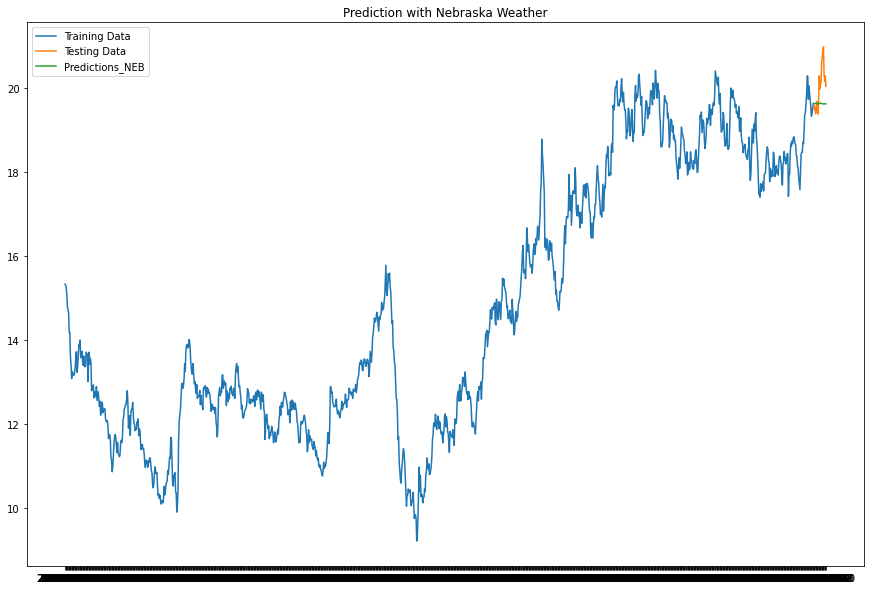

In [48]:
# Summary and plot for Nebraska location
print(result_neb.summary())

plt.figure(figsize=(15, 10))

plt.plot(train_data_neb.index, train_data_neb['Close'], label='Training Data')
plt.plot(test_data_neb.index, test_data_neb['Close'], label='Testing Data')
plt.plot(pred_neb.index, pred_neb['Predictions_NEB'], label='Predictions_NEB')

plt.title('Prediction with Nebraska Weather')
plt.legend(loc='best')
plt.show()

In [49]:
from sklearn.metrics import r2_score
r2_score(test_data_neb['Close'], pred_neb['Predictions_NEB'])

-0.6645259089903843

In [ ]:
# Concatenate weather data for all locations
exog_train_all = pd.concat([exog_train_arg.add_suffix('_arg'), exog_train_bra.add_suffix('_bra'), 
                            exog_train_cal.add_suffix('_cal'), exog_train_ill.add_suffix('_ill'), 
                            exog_train_iow.add_suffix('_iow'), exog_train_min.add_suffix('_min'), 
                            exog_train_neb.add_suffix('_neb')], axis=1)
exog_test_all = pd.concat([exog_test_arg, exog_test_bra, exog_test_cal, exog_test_ill, 
                           exog_test_iow, exog_test_min, exog_test_neb], axis=1)

exog_train_all.dropna(inplace=True)


# Fit the ARIMA model with exogenous variables
model = sm.tsa.ARIMA(train_data_arg['Close'], order=(0,1,0), exog=exog_train_all)

# Train the model
result = model.fit()

In [51]:
# Print the summary of the model
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1236
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -32.385
Method:                           css   S.D. of innovations              0.248
Date:                Sat, 08 Apr 2023   AIC                            110.771
Time:                        00:20:36   BIC                            228.522
Sample:                             1   HQIC                           155.062
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0031      0.164      0.019      0.985      -0.318       0.324
Mean_Temp_arg         -0.0048      0.003     -1.656      0.098      -0.011       0.001
Mean_Precip_arg     

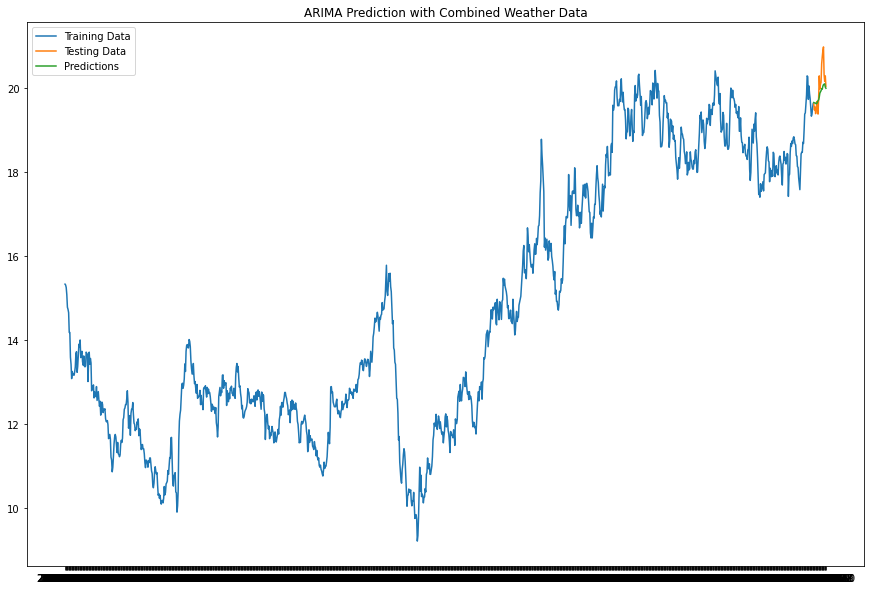

In [52]:
# Forecast
pred = result.forecast(steps=21, exog=exog_test_all)
pred = pd.DataFrame(pred[0], index=test_data_arg.index, columns=['Predictions_ALL'])

# Plot the predicted values and the confidence interval
plt.figure(figsize=(15, 10))
plt.plot(train_data_arg.index, train_data_arg['Close'], label='Training Data')
plt.plot(test_data_arg.index, test_data_arg['Close'], label='Testing Data')
plt.plot(pred.index, pred['Predictions_ALL'], label='Predictions')
plt.legend(loc='best')
plt.title('ARIMA Prediction with Combined Weather Data')
plt.show()

In [53]:
from sklearn.metrics import r2_score
r2_score(test_data_neb['Close'], pred['Predictions_ALL'])

0.3543153497309236

In [54]:
# Fit the ARIMA model with exogenous variables
model = sm.tsa.ARIMA(train_data_arg['Close'], order=(2,1,2), exog=exog_train_all)

# Train the model
result = model.fit()

# Print the summary of the model
print(result.summary())

C:\Users\jjtan.TABLET-QA4PM1BJ\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\jjtan.TABLET-QA4PM1BJ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, bu

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1236
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 -32.340
Method:                       css-mle   S.D. of innovations              0.248
Date:                Sat, 08 Apr 2023   AIC                            118.679
Time:                        00:31:49   BIC                            256.909
Sample:                             1   HQIC                           170.673
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0053      0.162      0.033      0.974      -0.312       0.323
Mean_Temp_arg         -0.0048      0.003     -1.663      0.096      -0.010       0.001
Mean_Precip_arg     

C:\Users\jjtan.TABLET-QA4PM1BJ\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


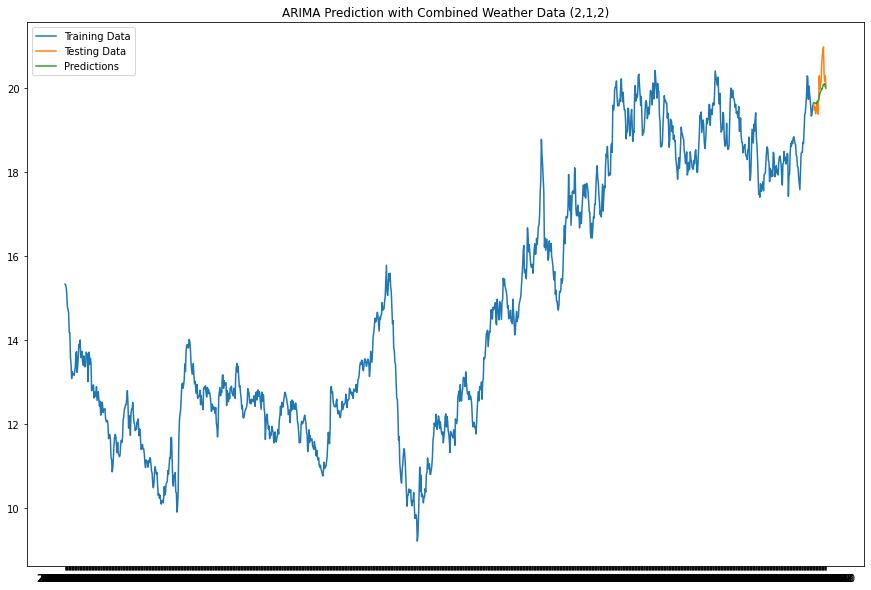

In [55]:
# Forecast
pred = result.forecast(steps=21, exog=exog_test_all)
pred = pd.DataFrame(pred[0], index=test_data_arg.index, columns=['Predictions_ALL'])

# Plot the predicted values and the confidence interval
plt.figure(figsize=(15, 10))
plt.plot(train_data_arg.index, train_data_arg['Close'], label='Training Data')
plt.plot(test_data_arg.index, test_data_arg['Close'], label='Testing Data')
plt.plot(pred.index, pred['Predictions_ALL'], label='Predictions')
plt.legend(loc='best')
plt.title('ARIMA Prediction with Combined Weather Data (2,1,2)')
plt.show()

In [56]:
from sklearn.metrics import r2_score
r2_score(test_data_neb['Close'], pred['Predictions_ALL'])

0.3613449733107449